In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import random
K=3

def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)

def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot(nx,ny,m,C):
    x = np.linspace(-10,10,nx)
    y = np.linspace(-10,10,ny)
    X,Y = np.meshgrid(x,y,indexing="ij")
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec,m,C)
    return X,Y,Z

# Define three means
Means = np.array([[0, 3], [3, 0], [4,4]])

# Define three covariance matrices ensuring
# they are positive definite
CovMatrices = np.zeros((3,2,2))
for j in range(3):
    CovMatrices[j,:,:] = make_spd_matrix(2)

# Priors
w = np.random.rand(3)
w = w / np.sum(w)

# How many data in each component (1000 in total)
nData = np.floor(w * 1000).astype(int)

# Draw samples from each component
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])

# Append into an array for the data we need
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)

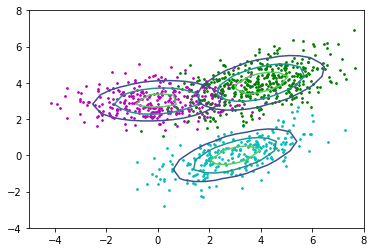

In [2]:
plt.xlim(-5, 8)
plt.ylim(-4, 8)


plt.scatter(X0[:,0], X0[:,1], s=3,c="m")
plt.scatter(X1[:,0], X1[:,1], s=3,c="c")
plt.scatter(X2[:,0], X2[:,1], s=3,c="g")


nx, ny = 50,40
for i in range(K):
    Xp,Yp,Zp = twoDGaussianPlot(nx,ny,Means[i],CovMatrices[i])
    plt.contour(Xp,Yp,Zp,3)

In [10]:
minimumerror = 0.001

def distance(x,y): # Calculate the distance between two central points
    dist = 0
    for i in range(len(x)):
        dist += (x[i]-y[i])**2
    return np.sqrt(dist)

def findclosestcentreindex(x,centres): # Find the index of the closest centre point
    closestcentre = None
    shortest = 9999999999999
    for i in range(len(centres)):
        dist = distance(x,centres[i])
        if (dist < shortest):
            closestcentre = i
            shortest = dist
    return closestcentre

def notfinished(errors,minimumerror): # Check if any centre points are not moving
    if errors is None:
        return True
    for i in errors:
        if i > minimumerror:
            return True
    return False

def mykmeans(X,K): # K means algorithm
    
    centres = []
    databyclosest = [] # Group the data by distance
    for i in range(K):
        centres.append(random.choice(X))
        databyclosest.append([])

    for coord in X: #Find closest point to each data point
        index = findclosestcentreindex(coord,centres)
        databyclosest[index].append(coord)

    for i in range(K): #Convert to numpy array
        databyclosest[i] = np.asarray(databyclosest[i])

    centrehistory = [] #Keep track of history of previous centre points
    centrehistory.append(list(centres))
    errors = None
    while notfinished(errors,minimumerror): #Main loop
        errors = [] #How far away each is from previous centre point
        for i in range(K): #Calculate new centres
            dims = len(databiyclosest[0][0]) #Number of dimensions
            sumofpoints = [0 for i in range(dims)]
            totalx = 0
            totaly = 0
            for item in databyclosest[i]: #Add coordinates to total to find mean
                for dim in range(dims):
                    sumofpoints[dim] += item[dim] 
            for dim in range(dims):
                sumofpoints[dim] /= len(databyclosest[i]) #Divide by number of dimensions

            errors.append(distance(sumofpoints,centres[i]))
            centres[i] = (sumofpoints)

        centrehistory.append(list(centres)) #Keep track of history

        databyclosest = []
        for i in range(K): #Reset databyclosest
            databyclosest.append([])

        for coord in X: #Update the grouping
            index = findclosestcentreindex(coord,centres)
            databyclosest[index].append(coord)
        for i in range(K): #Convert to numpy array
            databyclosest[i] = np.asarray(databyclosest[i])
          
    return (centres, databyclosest,centrehistory)
        
centres, databyclosest, centrehistory = mykmeans(X,K)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


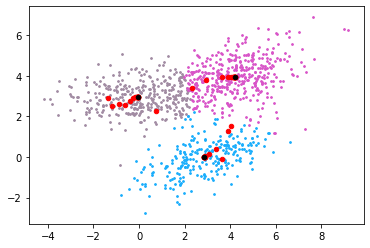

In [11]:
for i in databyclosest:
    plt.scatter(i[:,0], i[:,1], s=3,c=np.random.rand(3,))
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,0],centres2[:,1],s=20,c="red")
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,0],centres2[:,1],s=20,c="black")

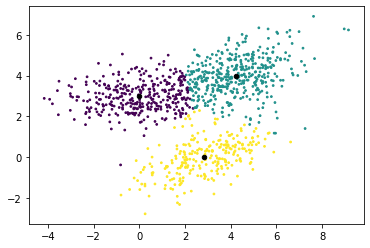

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=3, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20)

In [1]:
file = open("lab6 data.csv","r")
lines = file.readlines()
data = []
targets = []
for x in lines: # Format the data
    line = x.split(",")
    if line[0] == 'ï»¿0':
        line[0] = "0"
    for i in range(5):
        line[i] = float(line[i])
    data.append(line[:5])
    targets.append(line[5])

dim1 = 0
dim2 = 1
    
centres, databyclosest, centrehistory = mykmeans(data,4)
for i in databyclosest:
    plt.scatter(i[:,dim1], i[:,dim2], s=3,c=np.random.rand(3,))
for i in centrehistory:
    centres2 = np.asarray(i)
    plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="red")
    
centres2 = np.asarray(centres)
plt.scatter(centres2[:,dim1],centres2[:,dim2],s=20,c="black")

NameError: name 'mykmeans' is not defined